# Trabalho de Cálculo Numérico
### Grupo: Luís Felipe, Pedro Fellipe, Thiago Cosme


### Questão 1 a e b:
Abaixo está o programa que interpola os pontos dados pela fómula de Lagrange. Plotamos os pontos tabelados (em azul), o polinômio interpolador (em laranja) e também os pontos correspondentes a f(0.20) e f(0.22) (em verde). Logo abaixo imprimimos as estimativas para f(0.20) e f(0.22)

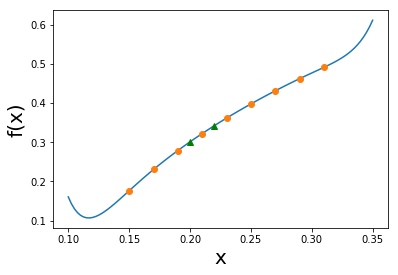

Pelo método de Lagrange: 

f(0.20) = 0.30103611755371096
f(0.22) = 0.34239778747558597


In [149]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = [0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31]
Y = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979,0.4314, 0.4624, 0.4914]

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor



Ylagrange = []
Xlagrange = np.linspace(0.10, 0.35, num = 100)
for xlagrange in Xlagrange:
    ylagrange = calculaP(xlagrange)
    Ylagrange.append(ylagrange)

    
    
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20)
plt.plot(Xlagrange, Ylagrange,'-', X, Y, 'o', 0.20, calculaP(0.20),'g^',0.22, calculaP(0.22), 'g^')
plt.show()


print ("Pelo método de Lagrange: \n")
print ("f(0.20) =", calculaP(0.20))
print ("f(0.22) =", calculaP(0.22))

### Questão 1 c:
Para que o polinômio interpolador seja do terceiro grau, optamos usar o método de Lagrange usando quatro pontos. 
No gráfico os pontos interpolados estão plotados como pontos e os não interpolados como 'x'. No fim imprimimos as aproximações de f(0.20) e f(0.22).

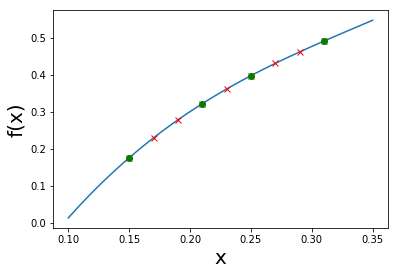

Pelo método de Lagrange: 

f(0.20) = 0.3008880208333334
f(0.22) = 0.34247906250000004


In [148]:
import matplotlib.pyplot as plt
import numpy as np

# Pontos Tabelados
X_0 = [0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31]
Y_0 = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979,0.4314, 0.4624, 0.4914]

# Pontos Interpolados
X = [0.15,0.21,0.25,0.31]
Y = [0.1761, 0.3222, 0.3979, 0.4914]

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor



Xnew = np.linspace(0.10, 0.35, num = 100)
Ynew = []
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)

    
    
plt.xlabel('x',fontsize=20)
plt.ylabel('f(x)',fontsize=20)
plt.plot(Xnew, Ynew,'-', X_0, Y_0, 'rx', X, Y, 'go')
plt.show()

print ("Pelo método de Lagrange: \n")
print ("f(0.20) =", calculaP(0.20))
print ("f(0.22) =", calculaP(0.22))

### Questão 1 d:

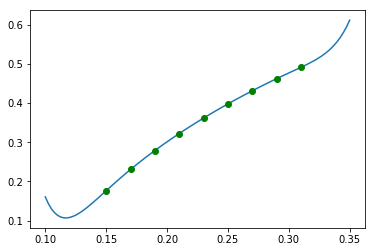

Pelo método de Newton: 

f(0.20) = 0.30103611755371096
f(0.22) = 0.342397787475586


In [150]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


X = [0.15,0.17,0.19,0.21,0.23,0.25,0.27,0.29,0.31]
Y = [0.1761, 0.2304, 0.2788, 0.3222, 0.3617, 0.3979,0.4314, 0.4624, 0.4914]

# Criando uma lista de listas para a tabela de diferencas divididas 
dd=[Y] #ordem 0



# Gerando a tabela de dif. div. a partir da ordem 1 em diante
for o in range(1, len(X)):
    dd.append([])   # Adiciona uma lista vazia para armazenar as dds de ordem 1
    for k in range(0, len(X)-o, 1): 
        valor = (dd[o-1][k+1]-dd[o-1][k])/(X[k+o]-X[k])    
 
        dd[o].append(valor)
    


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma


 
Xnewton = np.linspace(0.10, 0.35, num = 100) 
Ynewton = []
for x in Xp:
    y = calculaP(x)
    Ynewton.append(y)


    

plt.plot( Xnewton, Ynewton,'-',X, Y, 'go')
plt.show()


print ("Pelo método de Newton: \n")
print ("f(0.20) =", calculaP(0.20))
print ("f(0.22) =", calculaP(0.22))

Sobrepondo os gráfico obtidos pelos dois métodos, percebemos que os polinômios são idênticos, logo não importa o método de interpolação, o resultado será o mesmo.

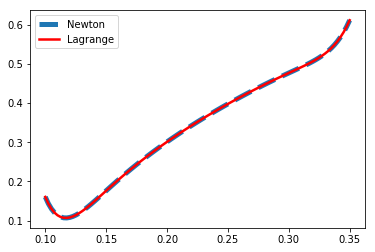

In [145]:
plt.plot(Xnewton, Ynewton,'--', linewidth=5) 
plt.plot(Xlagrange, Ylagrange,'r-', linewidth=2.5)
plt.legend(('Newton', 'Lagrange'))
plt.show()


### Questão 2

No programa abaixo foi utilizado o método dos mínimos quadrados para determiar a parábola que melhor ajusta os dados. Para saber onde a fração de luz polarizada é mínima nós calculamos a derivada e igualamos a zero.

θB= 64.90000000000029
FB= 4.359997767854367


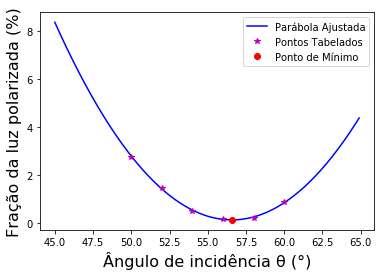

In [163]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([50, 52, 54, 56, 58, 60]) # Ângulo de incidência
Y = np.array([2.75, 1.45,0.50, 0.15 ,0.20 ,0.85]) # Fração da luz polarizada


# Calcula os elementos das marizes
A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A23 = np.sum(X)
A33 = len(X)
B1 = np.sum(X**2*Y) 
B2 = np.sum(X*Y)
B3 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[A11,A12, A13],[A12, A13, A23], [A13, A23, A33]])
B = np.array([B1,B2,B3])
a = solve(A, B)


# define a funcao g(x) para plotar 
g = lambda x: a[0]*x*x+a[1]*x+a[2]


# cria pontos (x, y) da reta 
Xr = np.arange(45, 65, 0.1)
Yr = []
for x in Xr:
    Yr.append(g(x))    

# Plota os pontos e a reta
#plt.plot(X, Y, ".",Xr ,g(Xr), '-') 
#ponto de mínimo
xmin=-a[1]/(2*a[0])

print("θB=",x)
print("FB=",g(x))



plt.xlabel('Ângulo de incidência θ (°)',fontsize=16)
plt.ylabel('Fração da luz polarizada (%)',fontsize=16)
plt.plot(Xr ,g(Xr), 'b-', X, Y, "m*", xmin, g(xmin),"ro") 
plt.legend(('Parábola Ajustada', 'Pontos Tabelados', 'Ponto de Mínimo'))
plt.show()

### Questão 3
Foi usado o método dos mínimos quadrados com um polinômio de grau um para determinar a tensão de cisalhamento na superfície plana, como segue o programa abaixo:

Erro:  0.04957570526315782


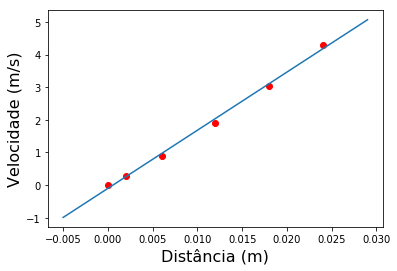

In [168]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0, 0.002, 0.006, 0.012, 0.018, 0.024]) # Distância da superfície
Y = np.array([0, 0.287, 0.899, 1.915, 3.048, 4.299]) # Velocidade

# Calcula os elementos das marizes
a11 = np.sum(X**2)
a12 = np.sum(X)
a22 = len(X)
b1 = np.sum(X * Y)
b2 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])
B = np.array([b1,b2])
a = solve(A, B)


# define a funcao g(x) para plotar 
glinear = lambda x: a[0]*x+a[1]


Xr = np.arange(-0.005, 0.030, 0.001)
soma=0
for i in range (len(X)):
    soma+=(Y[i]-g(X[i]))**2
    
print ("Erro: ",soma)




plt.xlabel('Distância (m)',fontsize=16)
plt.ylabel('Velocidade (m/s)',fontsize=16)
plt.plot(X, Y, "ro", Xr, glinear(Xr),'-') 
plt.show()


Observamos que os pontos também podem ser ajustados através de um polinômio de grau 2, como segue o programa abaixo:

Erro:  1.9740259740273122e-07


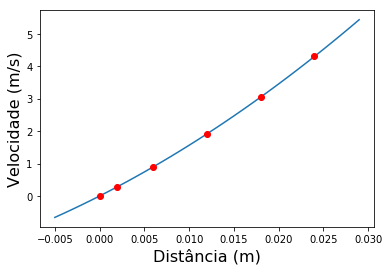

O valor da tensão de cisalhamento é: 0.004221132467532453 Pascal


In [176]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0, 0.002, 0.006, 0.012, 0.018, 0.024]) # Distância da superfície
Y = np.array([0, 0.287, 0.899, 1.915, 3.048, 4.299]) # Velocidade


# Calcula os elementos das marizes
A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A23 = np.sum(X)
A33 = len(X)
B1 = np.sum(X**2*Y) 
B2 = np.sum(X*Y)
B3 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[A11,A12, A13],[A12, A13, A23], [A13, A23, A33]])
B = np.array([B1,B2,B3])
a = solve(A, B)


# define a funcao g(x) para plotar 
g = lambda x: a[0]*x*x+a[1]*x+a[2]


# cria pontos (x, y) da reta 
Xr = np.arange(-0.005, 0.030, 0.001)
Yr = []
for x in Xr:
    Yr.append(g(x))    
soma=0
for i in range (len(X)):
    soma+=(Y[i]-g(X[i]))**2
    
print ("Erro: ",soma)


plt.plot(Xr ,g(Xr), '-') 


plt.xlabel('Distância (m)',fontsize=16)
plt.ylabel('Velocidade (m/s)',fontsize=16)
plt.plot(X,Y, "ro") 
plt.show()


#Cálculo sa tensão de cisalhamento na superfície

y = 0
µ = 1.8*10**-5
dy = 2*a[0]*x+a[1] # Derivada da função ajustada


print("O valor da tensão de cisalhamento é:" ,dy*µ, "Pascal")

Como o erro do ajuste do polinômio de grau dois é bem menor que o de grau um, a parábola é a curva que melhor se ajusta aos pontos. Assim sendo, usamos os dados da matriz dos coeficientes da segunda função para calcular a derivada do polinômio interpolador e dessa forma calculamos a tensão de cisalhamento.


### Questão 4 a
Usamos as funções do Matplotlib para plotar os pontos.

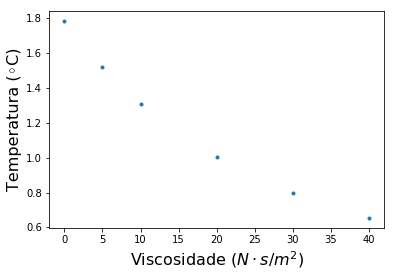

In [216]:
% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0, 5, 10, 20, 30, 40])
Y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])


plt.xlabel('Viscosidade ($N \cdot s/m^2$)',fontsize=16)
plt.ylabel('Temperatura (◦C)',fontsize=16)
plt.plot(X, Y,"." ) 
plt.show()

### Questão 4 b

Para prever a viscosidade dinâmica da água $(µ)$ a 7,5°C usamos o método de interpolação de Lagrange.

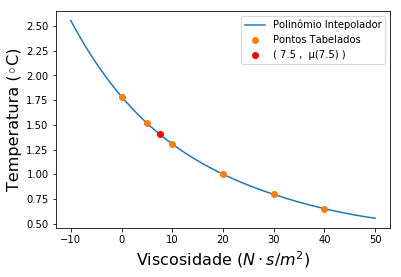


Interpolação pelo método de Lagrange:
    µ(7.5) = 1.4068632289341518


In [219]:
% matplotlib inline
import matplotlib.pyplot as plt

X = np.array([0, 5, 10, 20, 30, 40])
Y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

n = len(Y)

def calculaP(x):
    valor = 0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k != i:
                lk = lk*(x - X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk 
    return valor


Ynew = []
Xnew = np.linspace(-10, 50, num=100)
for xnew in Xnew:
    ynew = calculaP(xnew)
    Ynew.append(ynew)

    
plt.plot(Xnew, Ynew,'-', X, Y, 'o', 7.5, calculaP(7.5),'ro')
plt.legend(('Polinômio Intepolador', 'Pontos Tabelados', '( 7.5 ,  µ(7.5) )'))
plt.xlabel('Viscosidade ($N \cdot s/m^2$)',fontsize=16)
plt.ylabel('Temperatura (◦C)',fontsize=16)
plt.show()


print ("\nInterpolação pelo método de Lagrange:")
print ("    µ(7.5) =", calculaP(7.5))

### Questão 4 c
No programa abaixo o método utilizado foi o dos mínimos quadrados, ajustando-se os pontos à uma parábola para que possa ser feita a previsão da função µ nesse mesmo ponto.

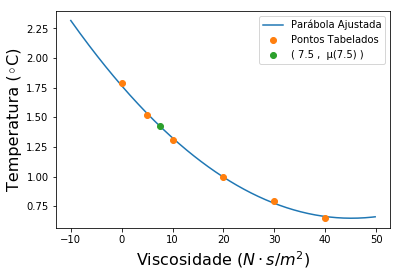


Ajuste por parábola e mínimos quadrados:
    µ(7,5)= 1.4268889576826984


In [218]:

% matplotlib inline
import numpy as np
from scipy.linalg import solve
import matplotlib.pyplot as plt

X = np.array([0, 5, 10, 20, 30, 40])
Y = np.array([1.787, 1.519, 1.307, 1.002, 0.7975, 0.6529])

# Calcula os elementos das marizes
A11 = np.sum(X**4)
A12 = np.sum(X**3)
A13 = np.sum(X**2)
A23 = np.sum(X)
A33 = len(X)
B1 = np.sum(X**2*Y) 
B2 = np.sum(X*Y)
B3 = np.sum(Y)

# Monta e resolve o sistema
A = np.array([[A11,A12, A13],[A12, A13, A23], [A13, A23, A33]])
B = np.array([B1,B2,B3])
a = solve(A, B)


# define a funcao g(x) para plotar 
g = lambda x: a[0]*x*x+a[1]*x+a[2]


# cria pontos (x, y) da reta 
Xr = np.arange(-10, 50, 0.2)
Yr = []
for x in Xr:
    Yr.append(g(x))    

# Plota os pontos e a reta
plt.plot(Xr, Yr, '-', X, Y, 'o', 7.5 ,g(7.5), 'o') 
plt.legend(('Parábola Ajustada', 'Pontos Tabelados', '( 7.5 ,  µ(7.5) )'))
plt.xlabel('Viscosidade ($N \cdot s/m^2$)',fontsize=16)
plt.ylabel('Temperatura (◦C)',fontsize=16)
plt.show()

print("\nAjuste por parábola e mínimos quadrados:")
print("    µ(7,5)=",g(7.5))

### Questão 5
A partir dos valores dados de Tensão e taxa de arrasto, foi possível linearizar os pontos através do método de ajuste de potência, onde aplicamos ln tanto nos dados de arrasto quanto nos dados da tensão, logo depois, criamos a funçao f(x) e usamos a função Solve do scipy. Após isso, foi possível encontrar os valores de B e de m.
Com os valores de B e m em mãos, criamos uma função g(x) onde os x são os valores de tensão e, através desta função, foi possível uma boa aproximação dos valores da taxa de arrasto.

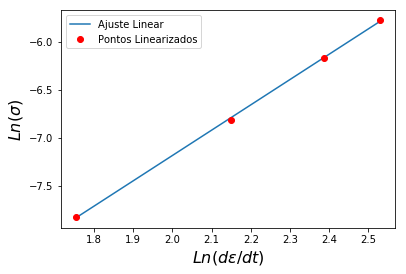

O Valor de B é:  3.889245050323291e-06
O Valor de m é:  2.6363775665134233





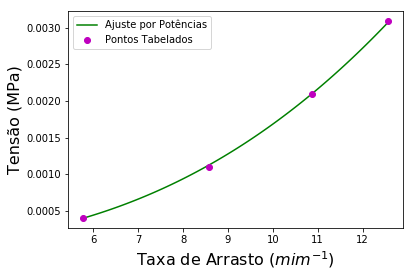

In [251]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import solve
import math

X = np.array([5.775, 8.577, 10.874, 12.555])
Y = np.array([0.0004, 0.0011, 0.0021, 0.0031])

# Linearização dos pontos
X1 = np.log(X)
Y1 = np.log(Y)

# Calcula os elementos das matrizes
a11 = np.sum(X1**2)
a12 = np.sum(X1)
a22 = len(X1)
b1 = np.sum(X1 * Y1)
b2 = np.sum(Y1)

# Monta e resolve o sistema
A = np.array([[a11, a12], [a12, a22]])
B = np.array([b1,b2])
a = solve(A, B)

# Função Linearizada
f = lambda x: a[0]*x+a[1]

# cria pontos (x, y) da reta 
Xr = np.linspace(X1[0],X1[-1],num=50)




plt.plot(Xr, f(Xr), "-", X1, Y1, "ro")
plt.legend(('Ajuste Linear', 'Pontos Linearizados'))
plt.xlabel('$Ln (d \epsilon/dt$)',fontsize=16)
plt.ylabel('$Ln (\sigma$)',fontsize=16)
plt.show()





#Encontrando valores para β e m

B = math.exp(a[1])
m = a[0]



print("O Valor de B é: ",B)
print("O Valor de m é: ",m)
print("\n\n")


# Ajuste por potências

g = lambda x: B*x**m

Xn = np.linspace(X[0],X[-1],num=100)
Yn = []
for x in Xn:
    Yn.append(g(x))


    
plt.plot(Xn, Yn, "g-", X, Y, "mo")
plt.legend(('Ajuste por Potências', 'Pontos Tabelados'))
plt.xlabel('Taxa de Arrasto ($mim^{-1}$)',fontsize=16)
plt.ylabel('Tensão (MPa)',fontsize=16)
plt.show()

Assim temos que a função que ajusta esses pontos é:
    $$ \cfrac{d\epsilon}{dt} = (3.889 \times 10^{-6})~ x^{2,636}$$